# Описание проекта

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Описание данных
Технологический процесс:

Rougher feed — исходное сырье
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
Xanthate — ксантогенат (промотер, или активатор флотации);
Sulphate — сульфат (на данном производстве сульфид натрия);
Depressant — депрессант (силикат натрия).
Rougher process (англ. «грубый процесс») — флотация
Rougher tails — отвальные хвосты
Float banks — флотационная установка
Cleaner process — очистка
Rougher Au — черновой концентрат золота
Final Au — финальный концентрат золота

Параметры этапов
air amount — объём воздуха
fluid levels — уровень жидкости
feed size — размер гранул сырья
feed rate — скорость подачи

Наименование признаков
rougher — флотация
primary_cleaner — первичная очистка
secondary_cleaner — вторичная очистка
final — финальные характеристики
input — параметры сырья
output — параметры продукта
state — параметры, характеризующие текущее состояние этапа
calculation — расчётные характеристики

# 1. Подготовка данных

Все импорты - в чердак.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

Закидываем таблицы в переменные и выводим показатели таблиц через функцию .info(), проверяем наличие пропусков

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
train.info()
train.isnull().sum()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.info()
test.isnull().sum()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full_data.info()
full_data.isnull().sum()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


- в test'e отсутствуют значения output (целевые признаки) и calculation в этапе rouger
- в данных есть пропуски, посмотрев на выведенные первые пять строк таблиц, можно придти к выводу, что пропуски стоит заполнять способом ближайших соседних значений fillna(method='ffil').

Теперь займемся расчетом recovery:

In [6]:
def recovery(C, F, T):
    
    numerator = (C*(F-T))
    denominator =(F*(C-T))
    
    rec = numerator / denominator * 100
    
    return rec

In [7]:
t,f,c = train['rougher.output.tail_au'], train['rougher.input.feed_au'], train['rougher.output.concentrate_au']
rec = recovery(c, f, t)
right_recovery_sum = np.isclose(train['rougher.output.recovery'], rec).sum()
right_recovery_sum, train.shape[0]-right_recovery_sum

(14287, 2573)

Займёмся теперь MAE между рассчитанными значениями и целевым столбцом:

In [8]:
train['rougher.output.recovery_count'] = (train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])) / (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])) * 100

In [9]:
train['MAE'] = abs(train['rougher.output.recovery'] - train['rougher.output.recovery_count'])
print('Ошибка равна', train['MAE'].mean())

Ошибка равна 9.444891926100695e-15


In [10]:
(train['MAE'])

0        0.000000e+00
1        1.421085e-14
2        0.000000e+00
3        0.000000e+00
4        0.000000e+00
             ...     
16855    0.000000e+00
16856    0.000000e+00
16857    0.000000e+00
16858    0.000000e+00
16859    2.842171e-14
Name: MAE, Length: 16860, dtype: float64

Исходя из значения MAE, делаем вывод, что расчёты верны.

Сравним теперь признаки в тренировочной и тестовой выборке:

In [11]:
missing_columns = set(train.columns) - set(test.columns) 
missing_columns

{'MAE',
 'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery_count',
 'rougher.output.tail_ag',
 'ro

В тестовом наборе отсутствуют значения различных этапов (output.concentrate, output.tails), плюс данные по расчету флотации rouger.calculation. Нет данных output и это логично - т.к. это целевые признаки, как было уже указано выше. При обучении модели нам потребуются только две целевые колонки rougher.output.recovery и final.output.recovery.

Займёмся теперь удалением нулевых значений в данных и заполнением пропусков. 

In [12]:
print(train.shape)
print(test.shape)

(16860, 89)
(5856, 53)


In [13]:
missing_cols = train.columns.drop(test.columns)
train[missing_cols].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,rougher.output.recovery_count,MAE
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185,87.107763,0.000000e+00
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248,86.843261,1.421085e-14
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187,86.842308,0.000000e+00
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062,87.226430,0.000000e+00
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448,86.688794,0.000000e+00


In [14]:
cols_to_drop = missing_cols.drop(['final.output.recovery', 'rougher.output.recovery'])
right_cols = train.columns.drop(cols_to_drop)
train = train[right_cols]

In [15]:
target_features_to_join = full_data[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()

In [16]:
test = test.join(target_features_to_join.set_index('date'), on='date')

In [17]:
train['final.output.recovery'].isnull().value_counts()

False    15339
True      1521
Name: final.output.recovery, dtype: int64

In [18]:
test['final.output.recovery'].isnull().value_counts()

False    5414
True      442
Name: final.output.recovery, dtype: int64

In [19]:
train.dropna(subset = ['final.output.recovery', 'rougher.output.recovery'], inplace = True)
test.dropna(subset = ['final.output.recovery', 'rougher.output.recovery'], inplace = True)

In [20]:
test.reset_index(drop=True, inplace=True)
train.reset_index(drop=True, inplace=True)

In [21]:
print(train.shape)
print(test.shape)

(14149, 55)
(5290, 55)


# 2. Анализ данных

2.1. Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Сначала подготовим переменные с нужными показанями из таблиц по каждому металлу:

In [22]:
au_data = (full_data[[
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au']].copy())

In [23]:
ag_data = (full_data[[
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 
    'final.output.concentrate_ag']].copy())

In [24]:
pb_data = (full_data[[
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb']].copy())

Теперь напишем функцию, которая покажет значения металла на каждом из этапов на одном графике для наглядности.

In [25]:
def draw_hist (data, title):
    fig, ax = plt.subplots()
    ax.set_ylabel('Кол-во наблюдений')
    ax.set_xlabel('Концентрация металла')
    ax.set_title(title)
    for col in data:
        data[col].hist(alpha=.3) 
        ax.legend(['Исходное сырье','Флотация','Первичная очистка', 'Вторичная очистка'])

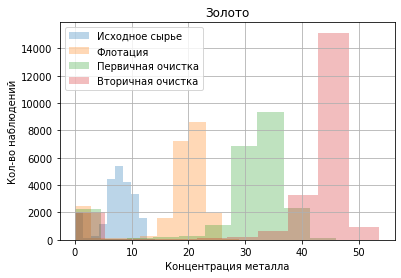

In [26]:
draw_hist(au_data, 'Золото')

Показатели выглядят адекватно: концентрация золота с каждым этапом очистки всё возрастает.

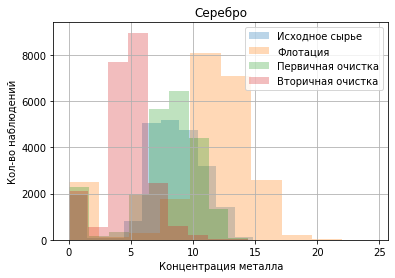

In [27]:
draw_hist(ag_data, 'Серебро')

Наличие серебра с каждым этапом становится всё незначительнее.

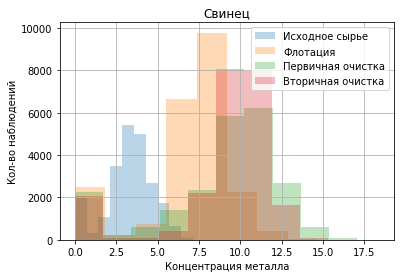

In [28]:
draw_hist(pb_data, 'Свинец')

Любопытная ситуация со свинцом - его показатели наоборот растут, достигая максимальные значения на финальной вторичной очистке. Из своих скудных знаний по металлам позволю себе предположить такое объяснение: свинец и золото - мягкие металлы, возможно этапы очистки влияют на металлы, обладающие похожими показателями по мягкости - одинаково.

Распределение размеров гранул сырья на обучающей и тестовой выборках: они должны быть сопоставимы, чтобы наша модель работала корректно.

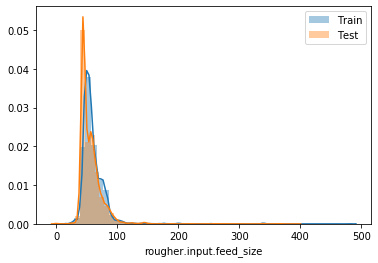

In [29]:
sns.distplot(train['rougher.input.feed_size'].dropna())
sns.distplot(test['rougher.input.feed_size'].dropna())
plt.legend(['Train', 'Test']);

Делаем вывод, что распределния не имеют той разницы в показателях, которая сигнализировала бы нам об ошибке. Теперь сравним размер гранул после флотации:

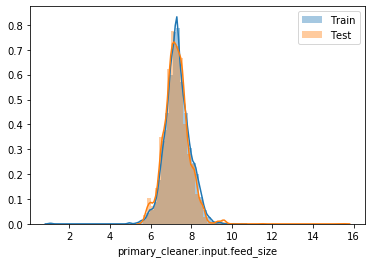

In [30]:
sns.distplot(train['primary_cleaner.input.feed_size'].dropna())
sns.distplot(test['primary_cleaner.input.feed_size'].dropna())
plt.legend(['Train', 'Test'])
plt.show()

Всё в порядке.

Исследуем теперь суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [31]:
full_data['rougher_input_feed'] = (full_data['rougher.input.feed_ag'] + 
                                 full_data['rougher.input.feed_pb']+
                                 full_data['rougher.input.feed_sol']+
                                 full_data['rougher.input.feed_au'])


# посчитаем суммарную концентрацию всех веществ в черновом концентрате
full_data['rougher_output_concentrate'] = (full_data['rougher.output.concentrate_ag'] + 
                                 full_data['rougher.output.concentrate_pb']+
                                 full_data['rougher.output.concentrate_sol']+
                                 full_data['rougher.output.concentrate_au'])

# посчитаем суммарную концентрацию всех веществ после первичной очистки
full_data['primary_cleaner_output_concentrate'] = (full_data['primary_cleaner.output.concentrate_ag'] + 
                                         full_data['primary_cleaner.output.concentrate_pb']+
                                         full_data['primary_cleaner.output.concentrate_sol']+
                                         full_data['primary_cleaner.output.concentrate_au'])

# посчитаем суммарную концентрацию всех веществ в финальном концентрате
full_data['final_output_concentrate'] = (full_data['final.output.concentrate_ag']+
                               full_data['final.output.concentrate_pb']+
                               full_data['final.output.concentrate_sol']+
                               full_data['final.output.concentrate_au'])

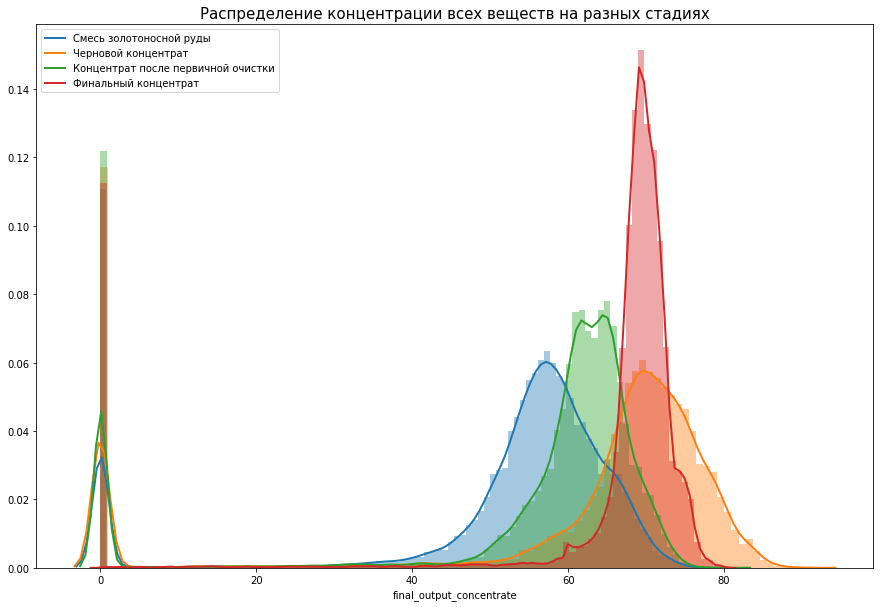

In [32]:
plt.figure(figsize=(15, 10))
plt.title('Распределение концентрации всех веществ на разных стадиях',fontsize=15)
sns.distplot(full_data['rougher_input_feed'], 
             bins=100, kde=True, kde_kws={"lw": 2, "label": "Смесь золотоносной руды"})
sns.distplot(full_data['rougher_output_concentrate'], 
             bins=100, kde=True, kde_kws={"lw": 2, "label": "Черновой концентрат"})
sns.distplot(full_data['primary_cleaner_output_concentrate'], 
             bins=100, kde=True, kde_kws={"lw": 2, "label": "Концентрат после первичной очистки"})
sns.distplot(full_data['final_output_concentrate'], 
             bins=100, kde=True, kde_kws={"lw": 2, "label": "Финальный концентрат"});

Видим значительное количество околонулевых наблюдений, их следует удалить. Проанализируем влияние экстремальных значений на выборку.

In [33]:
def whiskers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    low_whisker = Q1 - 1.5*IQR
    high_whisker = Q1 + 1.5*IQR
    return low_whisker, high_whisker

In [34]:
# определим верхние и нижние границы, от которых начинаются экстремальные значения
low_1, high_1 = whiskers(full_data['rougher_input_feed'])
low_2, high_2 = whiskers(full_data['rougher_output_concentrate'])
low_3, high_3 = whiskers(full_data['primary_cleaner_output_concentrate'])
low_4, high_4 = whiskers(full_data['final_output_concentrate'])

print('% выбросов до этапа флотации: {:.2%}'
. format(full_data.query('rougher_input_feed < @low_1')['date'].count()/
      full_data.shape[0]))
print('% выбросов после этапа флотации: {:.2%}'
      . format(full_data.query('rougher_output_concentrate < @low_2')['date'].count()/
      full_data.shape[0]))
print('% выбросов после этапа первичной очистки: {:.2%}'
     . format(full_data.query('primary_cleaner_output_concentrate < @low_3')['date'].count()/
      full_data.shape[0]))
print('% выбросов после финального этапа: {:.2%}'
      . format(full_data.query('final_output_concentrate <= @low_4')['date'].count()/
      full_data.shape[0]))

% выбросов до этапа флотации: 10.18%
% выбросов после этапа флотации: 13.29%
% выбросов после этапа первичной очистки: 12.08%
% выбросов после финального этапа: 13.19%


Объекты с экстремальными значениями в разных колонках могут пересекаться. Поэтому необходимо установить общую долю подобных значений в полной выборке.

In [35]:
anomaly_input_feed = full_data.query('rougher_input_feed < @low_1')['date']
anomaly_rougher = full_data.query('rougher_output_concentrate < @low_2')['date']
anomaly_primary_cleaner = full_data.query('primary_cleaner_output_concentrate < @low_3')['date']
anomaly_final = full_data.query('final_output_concentrate < @low_4')['date']

anomaly = anomaly_input_feed.append([anomaly_rougher, anomaly_primary_cleaner, anomaly_final]).drop_duplicates().reset_index(drop=True)
print('% выбросов: {:.2%}'. format(anomaly.count()/full_data.shape[0]))

% выбросов: 20.73%


Доля выбросов составляет 1/5 датасета: для того, чтобы избежать проблем с валидностью работы обучающей модели - пожертвуем этими данными и удалим их.

In [36]:
anomaly = anomaly.to_list()
train = train.query('date not in @anomaly').reset_index(drop=True)
test = test.query('date not in @anomaly').reset_index(drop=True)

In [37]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [38]:
train.isnull().values.any()

False

In [39]:
test.isnull().values.any()

False

# 3. Модель

In [40]:
def smape(y, y_pred):
    res = abs(y - y_pred) / ((abs(y) + abs(y_pred)) / 2)
    return res.sum() / len(res) * 100

In [41]:
def smape_final(smape_1, smape_2):
    return smape_1 * 0.25 + smape_2 * 0.75

In [42]:
y_rougher = train['rougher.output.recovery']
y_final = train['final.output.recovery']

X_tr = train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)

In [43]:
X_tr.shape

(11425, 52)

In [44]:
target_constant_r = pd.Series(y_rougher.median(), index=y_rougher.index)
target_constant_f = pd.Series(y_final.median(), index=y_final.index)

smape_r = smape(y_rougher, target_constant_r)
smape_f = smape(y_final, target_constant_f)

print('Результат константной модели sMAPE (rougher):', smape_r)
print('Результат константной модели sMAPE (final):', smape_f)
print('Результат константной модели итоговое sMAPE:', smape_final(smape_r, smape_f))

Результат константной модели sMAPE (rougher): 6.763974879043612
Результат константной модели sMAPE (final): 8.986651358723691
Результат константной модели итоговое sMAPE: 8.430982238803672


Линейная регрессия:

In [45]:
y_rougher = train['rougher.output.recovery']
y_final = train['final.output.recovery']

X_tr = train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1) 

line = LinearRegression()

smape_r = cross_val_score(line, X_tr, y_rougher, cv=5, scoring = make_scorer(smape, greater_is_better=False))
smape_f = cross_val_score(line, X_tr, y_final, cv=5, scoring = make_scorer(smape, greater_is_better=False))

print('Результат линейной регрессии на тренировчных данных sMAPE (rougher):', smape_r.mean()*(-1))
print('Результат линейной регрессии на тренировчных данных sMAPE (final):', smape_f.mean()*(-1))
print('Результат линейной регрессии на тренировчных данных итоговое sMAPE:', smape_final(smape_r, smape_f).mean()*(-1))

Результат линейной регрессии на тренировчных данных sMAPE (rougher): 6.8998631912369275
Результат линейной регрессии на тренировчных данных sMAPE (final): 9.97408749921588
Результат линейной регрессии на тренировчных данных итоговое sMAPE: 9.205531422221142


Модель дерева решения:

In [46]:
y_rougher = train['rougher.output.recovery']
y_final = train['final.output.recovery']

X_tr = train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1) 

tree = DecisionTreeRegressor(random_state=12345, max_depth=15)

smape_r = cross_val_score(tree, X_tr, y_rougher, cv=5, scoring = make_scorer(smape))
smape_f = cross_val_score(tree, X_tr, y_final, cv=5, scoring = make_scorer(smape))

print('Результат дерева решений на тренировчных данных sMAPE (rougher):', smape_r.mean())
print('Результат дерева решений на тренировчных данных sMAPE (final):', smape_f.mean())
print('Результат дерева решений на тренировчных данных итоговое sMAPE:', smape_final(smape_r, smape_f).mean())

Результат дерева решений на тренировчных данных sMAPE (rougher): 8.617437895307223
Результат дерева решений на тренировчных данных sMAPE (final): 13.609094927211391
Результат дерева решений на тренировчных данных итоговое sMAPE: 12.361180669235347


Модель случайного леса:

In [47]:
y_rougher = train['rougher.output.recovery']
y_final = train['final.output.recovery']

X_tr = train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1) 

forest = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=9)

smape_r = cross_val_score(forest, X_tr, y_rougher, cv=5, scoring = make_scorer(smape))
smape_f = cross_val_score(forest, X_tr, y_final, cv=5, scoring = make_scorer(smape))

print('Результат случайного леса на тренировчных данных sMAPE (rougher):', smape_r.mean())
print('Результат случайного леса на тренировчных данных sMAPE (final):', smape_f.mean())
print('Результат случайного леса на тренировчных данных итоговое sMAPE:', smape_final(smape_r, smape_f).mean())

Результат случайного леса на тренировчных данных sMAPE (rougher): 6.17827268521098
Результат случайного леса на тренировчных данных sMAPE (final): 8.918778457150356
Результат случайного леса на тренировчных данных итоговое sMAPE: 8.23365201416551


Лучшую работу показывает модель случайного леса, её и применим на тренировочной выборке:

In [48]:
y_rougher = train['rougher.output.recovery']
y_final = train['final.output.recovery']

X_tr = train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1) 

# Обучим модель на тренировчных данных

forest = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=9)

forest_rougher_model = forest.fit(X_tr, y_rougher)
forest_final_model = forest.fit(X_tr, y_final)

# Проверим на тестовых данных

y_rougher_test = test['rougher.output.recovery']
y_final_test = test['final.output.recovery']

X_tr_test = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1) 

smape_r = cross_val_score(forest_rougher_model, X_tr_test, y_rougher_test, cv=5, scoring = make_scorer(smape))
smape_f = cross_val_score(forest_final_model, X_tr_test, y_final_test, cv=5, scoring = make_scorer(smape))

print('Результат случайного леса на тестовых данных sMAPE (rougher):', smape_r.mean())
print('Результат случайного леса на тестовых данных sMAPE (final):', smape_f.mean())
print('Результат случайного леса на тестовых данных итоговое sMAPE:', smape_final(smape_r, smape_f).mean())

Результат случайного леса на тестовых данных sMAPE (rougher): 4.018234223401851
Результат случайного леса на тестовых данных sMAPE (final): 7.043133169964311
Результат случайного леса на тестовых данных итоговое sMAPE: 6.286908433323696
